<style>
    .section {
        background-color: #f7f7f7;
        border-radius: 8px;
        padding: 20px;
        box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
        margin-bottom: 20px;
        max-width: 1050px;
    }

    h1 {
        color: #0077b5;
        font-size: 32px;
        text-align: center;
        margin-bottom: 20px;
    }

    h2 {
        color: #0077b5;
        font-size: 24px;
        margin-bottom: 10px;
    }

    p {
        font-size: 18px;
        line-height: 1.6;
        margin-bottom: 10px;
        color: #333;
    }

    ul {
        list-style-type: none;
        padding-left: 0;
        font-size: 18px;
        line-height: 1.6;
        color: #333;
    }

    li {
        margin-bottom: 5px;
    }

    .bullet {
        display: inline-block;
        width: 10px;
        height: 10px;
        border-radius: 50%;
        background-color: #0077b5;
        margin-right: 8px;
    }

    .linkedin-link {
        text-align: center;
        margin-top: 20px;
    }

    .linkedin-button {
        display: inline-block;
        background-color: #0077b5;
        color: #fff;
        padding: 15px 30px;
        border-radius: 40px;
        font-size: 18px;
        font-weight: bold;
        cursor: pointer;
        text-decoration: none;
        transition: background-color 0.3s ease;
    }

    .linkedin-button:hover {
        background-color: #005F96;
    }
</style>

<div class="section">
    <h1>Feature Engineering - Part : B</h1>
    <p>
        Feature engineering is the process of transforming raw data into informative and predictive features that can be used effectively by machine learning models.
    </p>
</div>

<div class="section">
    <h2>Different steps used: </h2>
    <ul>
        <li><span class="bullet"></span>Imputation.</li>
        <li><span class="bullet"></span>Handling Outliers.</li>
        <li><span class="bullet"></span>Binning.</li>
        <li><span class="bullet"></span>Log Transformation.</li>
        <li><span class="bullet"></span>One-Hot Encoding.</li>
        <li><span class="bullet"></span>Grouping.</li>
    </ul>
</div>

<div class="section">
    <h2>Applications of Feature Engineering</h2>
    <p>
       Feature engineering is a fundamental step in the data preprocessing pipeline and plays a crucial role in various applications across different domains.
    </p>
</div>

<div style="text-align: center; margin-top: 20px;">
    <a href="https://www.linkedin.com/in/sohaib-awan-042b68244" target="_blank">
        <button style="background-color: #0077b5; color: #fff; padding: 15px 30px; border-radius: 40px; font-size: 18px; font-weight: bold; cursor: pointer;">Find me on LinkedIn</button>
    </a>
</div>


In [33]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 7)
sb.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [34]:
data = {
    'StudentID': [1, 2, 3, np.nan, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Name': ['John', 'Alice', 'Mark', 'Sarah', 'Mike', 'Emily', 'David', 'Amy', 'Daniel', 'Olivia', 'Jacob', 'Emma', 'Matthew', 'Sophia', 'Benjamin'],
    'Age': [20, 19, np.nan, 21, 22, 19, 20, 18, 19, 20, 22, np.nan, 21, 20, 19],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', np.nan, 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'Grade': [80, 92, 75, 87, 78, np.nan, 82, 90, 88, 94, 85, 79, 83, 91, 86],
    'Subject': ['Math', 'English', 'Science', 'History', 'Math', 'English', 'Science', 'History', 'Math', 'English', 'Science', 'History', np.nan, 'Math', 'English'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose', 'Austin', 'Jacksonville', 'San Francisco', 'Indianapolis', 'Seattle'],
    'Country': ['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', np.nan]
}

# Create the dataframe
data = pd.DataFrame(data)

# Print the dataframe
data


,StudentID,Name,Age,Gender,Grade,Subject,City,Country
0,1.0,John,20.0,M,80.0,Math,New York,USA
1,2.0,Alice,19.0,F,92.0,English,Los Angeles,USA
2,3.0,Mark,NaN,M,75.0,Science,Chicago,USA
3,NaN,Sarah,21.0,F,87.0,History,Houston,USA
4,5.0,Mike,22.0,M,78.0,Math,Phoenix,USA
5,6.0,Emily,19.0,F,NaN,English,Philadelphia,USA
6,7.0,David,20.0,NaN,82.0,Science,San Antonio,USA
7,8.0,Amy,18.0,M,90.0,History,San Diego,USA
8,9.0,Daniel,19.0,F,88.0,Math,Dallas,USA
9,10.0,Olivia,20.0,M,94.0,English,San Jose,USA


1) Imputation

In [35]:
threshold = 0.7

##Dropping columns with missing values greater than threshold
##Keeping those columns whose missing value rate is lower than 70%
data = data[data.columns[data.isnull().mean() < threshold]]

##Dropping rows with missing values less than threshold
##Keeping those rows missing value rate is lower than 70%
data = data.loc[data.isnull().mean(axis=1) < threshold]
data

,StudentID,Name,Age,Gender,Grade,Subject,City,Country
0,1.0,John,20.0,M,80.0,Math,New York,USA
1,2.0,Alice,19.0,F,92.0,English,Los Angeles,USA
2,3.0,Mark,NaN,M,75.0,Science,Chicago,USA
3,NaN,Sarah,21.0,F,87.0,History,Houston,USA
4,5.0,Mike,22.0,M,78.0,Math,Phoenix,USA
5,6.0,Emily,19.0,F,NaN,English,Philadelphia,USA
6,7.0,David,20.0,NaN,82.0,Science,San Antonio,USA
7,8.0,Amy,18.0,M,90.0,History,San Diego,USA
8,9.0,Daniel,19.0,F,88.0,Math,Dallas,USA
9,10.0,Olivia,20.0,M,94.0,English,San Jose,USA


In [36]:
data = data.dropna(subset=["StudentID"])
data

,StudentID,Name,Age,Gender,Grade,Subject,City,Country
0,1.0,John,20.0,M,80.0,Math,New York,USA
1,2.0,Alice,19.0,F,92.0,English,Los Angeles,USA
2,3.0,Mark,NaN,M,75.0,Science,Chicago,USA
4,5.0,Mike,22.0,M,78.0,Math,Phoenix,USA
5,6.0,Emily,19.0,F,NaN,English,Philadelphia,USA
6,7.0,David,20.0,NaN,82.0,Science,San Antonio,USA
7,8.0,Amy,18.0,M,90.0,History,San Diego,USA
8,9.0,Daniel,19.0,F,88.0,Math,Dallas,USA
9,10.0,Olivia,20.0,M,94.0,English,San Jose,USA
10,11.0,Jacob,22.0,F,85.0,Science,Austin,USA


--> Numerical Impuation

In [37]:
##Filling missing values with 0
# data = data.fillna(0)

##Filling the missing values with median
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())
data

,StudentID,Name,Age,Gender,Grade,Subject,City,Country
0,1.0,John,20.0,M,80.0,Math,New York,USA
1,2.0,Alice,19.0,F,92.0,English,Los Angeles,USA
2,3.0,Mark,20.0,M,75.0,Science,Chicago,USA
4,5.0,Mike,22.0,M,78.0,Math,Phoenix,USA
5,6.0,Emily,19.0,F,85.0,English,Philadelphia,USA
6,7.0,David,20.0,NaN,82.0,Science,San Antonio,USA
7,8.0,Amy,18.0,M,90.0,History,San Diego,USA
8,9.0,Daniel,19.0,F,88.0,Math,Dallas,USA
9,10.0,Olivia,20.0,M,94.0,English,San Jose,USA
10,11.0,Jacob,22.0,F,85.0,Science,Austin,USA


--> Categorical Imputation

In [38]:
data['Gender'].fillna(data['Gender'].value_counts().idxmax(), inplace=True)
data
#idxmax() returns the index label with maximum value, but here it returns most frequent one

,StudentID,Name,Age,Gender,Grade,Subject,City,Country
0,1.0,John,20.0,M,80.0,Math,New York,USA
1,2.0,Alice,19.0,F,92.0,English,Los Angeles,USA
2,3.0,Mark,20.0,M,75.0,Science,Chicago,USA
4,5.0,Mike,22.0,M,78.0,Math,Phoenix,USA
5,6.0,Emily,19.0,F,85.0,English,Philadelphia,USA
6,7.0,David,20.0,M,82.0,Science,San Antonio,USA
7,8.0,Amy,18.0,M,90.0,History,San Diego,USA
8,9.0,Daniel,19.0,F,88.0,Math,Dallas,USA
9,10.0,Olivia,20.0,M,94.0,English,San Jose,USA
10,11.0,Jacob,22.0,F,85.0,Science,Austin,USA


2) Handling Outliers

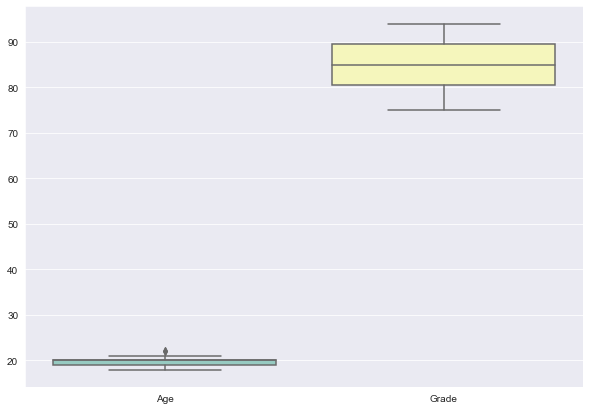

In [39]:
##checking outliers
sb.boxplot(data=data[['Age', 'Grade']])
plt.show()
#---------> As there are no outliers

    3) Binning:
    The main motivation of binning is to make the model more robust and prevent overfitting.
    Everytime you bin something you sacrifice information and make your data more regularized.
    It can be applied to both categorical and numerical variables:

    value       bin
    0-30        low
    31-70       medium
    71-100      high

    value       bin
    Italy       Europe
    Spain       Europe
    Chile       America
    Brazil      America
    China       Asia

In [40]:
grade_bin_edges = [0, 80, 90, 100]
grade_bin_labels = ["Good", "Very_Good", "Excellent"]

In [41]:
data.loc[:, "Performance"] = pd.cut(data["Grade"], bins = grade_bin_edges, labels = grade_bin_labels)
data

,StudentID,Name,Age,Gender,Grade,Subject,City,Country,Performance
0,1.0,John,20.0,M,80.0,Math,New York,USA,Good
1,2.0,Alice,19.0,F,92.0,English,Los Angeles,USA,Excellent
2,3.0,Mark,20.0,M,75.0,Science,Chicago,USA,Good
4,5.0,Mike,22.0,M,78.0,Math,Phoenix,USA,Good
5,6.0,Emily,19.0,F,85.0,English,Philadelphia,USA,Very_Good
6,7.0,David,20.0,M,82.0,Science,San Antonio,USA,Very_Good
7,8.0,Amy,18.0,M,90.0,History,San Diego,USA,Very_Good
8,9.0,Daniel,19.0,F,88.0,Math,Dallas,USA,Very_Good
9,10.0,Olivia,20.0,M,94.0,English,San Jose,USA,Excellent
10,11.0,Jacob,22.0,F,85.0,Science,Austin,USA,Very_Good


In [42]:
# Define the bin edges
bin_edges = [18, 20, 22, np.inf]

# Define the bin labels
bin_labels = ['18-20', '21-22', '23+']

# Apply binning to the 'Age' column
data.loc[:, 'AgeGroup'] = pd.cut(data['Age'], bins=bin_edges, labels=bin_labels)

# Print the updated dataframe
data


,StudentID,Name,Age,Gender,Grade,Subject,City,Country,Performance,AgeGroup
0,1.0,John,20.0,M,80.0,Math,New York,USA,Good,18-20
1,2.0,Alice,19.0,F,92.0,English,Los Angeles,USA,Excellent,18-20
2,3.0,Mark,20.0,M,75.0,Science,Chicago,USA,Good,18-20
4,5.0,Mike,22.0,M,78.0,Math,Phoenix,USA,Good,21-22
5,6.0,Emily,19.0,F,85.0,English,Philadelphia,USA,Very_Good,18-20
6,7.0,David,20.0,M,82.0,Science,San Antonio,USA,Very_Good,18-20
7,8.0,Amy,18.0,M,90.0,History,San Diego,USA,Very_Good,NaN
8,9.0,Daniel,19.0,F,88.0,Math,Dallas,USA,Very_Good,18-20
9,10.0,Olivia,20.0,M,94.0,English,San Jose,USA,Excellent,18-20
10,11.0,Jacob,22.0,F,85.0,Science,Austin,USA,Very_Good,21-22


    4) Log Transformation:

    Helps Skewed data and after transformation the distribution becomes more approximate to normal

    It also decreases the effect of outliers, due to normalization of magnitude differences 
    and model becomes more robust

In [43]:
data.loc[:, "age_log"] = np.log(data["Age"])
data

,StudentID,Name,Age,Gender,Grade,Subject,City,Country,Performance,AgeGroup,age_log
0,1.0,John,20.0,M,80.0,Math,New York,USA,Good,18-20,2.995732
1,2.0,Alice,19.0,F,92.0,English,Los Angeles,USA,Excellent,18-20,2.944439
2,3.0,Mark,20.0,M,75.0,Science,Chicago,USA,Good,18-20,2.995732
4,5.0,Mike,22.0,M,78.0,Math,Phoenix,USA,Good,21-22,3.091042
5,6.0,Emily,19.0,F,85.0,English,Philadelphia,USA,Very_Good,18-20,2.944439
6,7.0,David,20.0,M,82.0,Science,San Antonio,USA,Very_Good,18-20,2.995732
7,8.0,Amy,18.0,M,90.0,History,San Diego,USA,Very_Good,NaN,2.890372
8,9.0,Daniel,19.0,F,88.0,Math,Dallas,USA,Very_Good,18-20,2.944439
9,10.0,Olivia,20.0,M,94.0,English,San Jose,USA,Excellent,18-20,2.995732
10,11.0,Jacob,22.0,F,85.0,Science,Austin,USA,Very_Good,21-22,3.091042


    5) One-hot Encoding

In [44]:
# Select the columns for one-hot encoding
columns_to_encode = ['Gender', 'Subject']

# Apply one-hot encoding to the selected columns
encoded_data = pd.get_dummies(data, columns=columns_to_encode)

# Print the encoded DataFrame
encoded_data

,StudentID,Name,Age,Grade,City,Country,Performance,AgeGroup,age_log,Gender_F,Gender_M,Subject_English,Subject_History,Subject_Math,Subject_Science
0,1.0,John,20.0,80.0,New York,USA,Good,18-20,2.995732,False,True,False,False,True,False
1,2.0,Alice,19.0,92.0,Los Angeles,USA,Excellent,18-20,2.944439,True,False,True,False,False,False
2,3.0,Mark,20.0,75.0,Chicago,USA,Good,18-20,2.995732,False,True,False,False,False,True
4,5.0,Mike,22.0,78.0,Phoenix,USA,Good,21-22,3.091042,False,True,False,False,True,False
5,6.0,Emily,19.0,85.0,Philadelphia,USA,Very_Good,18-20,2.944439,True,False,True,False,False,False
6,7.0,David,20.0,82.0,San Antonio,USA,Very_Good,18-20,2.995732,False,True,False,False,False,True
7,8.0,Amy,18.0,90.0,San Diego,USA,Very_Good,NaN,2.890372,False,True,False,True,False,False
8,9.0,Daniel,19.0,88.0,Dallas,USA,Very_Good,18-20,2.944439,True,False,False,False,True,False
9,10.0,Olivia,20.0,94.0,San Jose,USA,Excellent,18-20,2.995732,False,True,True,False,False,False
10,11.0,Jacob,22.0,85.0,Austin,USA,Very_Good,21-22,3.091042,True,False,False,False,False,True


    6) Grouping

In [46]:
grouped_data = data.groupby('City')

# Select only numeric columns within each group
grouped_data_numeric = grouped_data.apply(lambda x: x.select_dtypes(include='number'))

# Calculate the mean of numeric columns within each group
mean_data = grouped_data_numeric.mean()

# Print the mean data
print(mean_data)


StudentID     8.285714
Age          19.928571
Grade        84.857143
age_log       2.990652
dtype: float64
